In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline


In [2]:
run src/preprocessing.py

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [4]:
def select_best_feature(method, candidate_features, current_features, dataset, target, model):
    candidate_features = list(candidate_features)
    scores = []
    
    for feature in candidate_features:
        
        features = list(current_features)
        if method == 'forward':
            features.append(feature)
        elif method == 'backward':
            if len(candidate_features) > 1:
                features.remove(feature)
        
        X = dataset[features]
        y = target
        model.fit(X, y)
        
        scores.append(model.score(X, y))
        
    scores = np.array(scores)
    
    best_feature_index = np.argmax(scores)
    best_feature = candidate_features[best_feature_index]
    best_score = scores[best_feature_index]
    return best_feature, best_score

In [5]:
select_best_feature('forward', dataset_1.columns[:10], [], dataset_1, target_1, LinearRegression())

('MSSubClass_60', 0.14515778384355849)

In [6]:
select_best_feature('backward', dataset_1.columns[:10], dataset_1.columns[:10], dataset_1, target_1, LinearRegression())

('MSSubClass_40', 0.21963126679987544)

In [11]:
def recursive_feature_selection(method, candidate_features, dataset, target, model):
    
    candidate_features = list(candidate_features)
    selected_features = []
    scores = []
    start = time()
    while len(candidate_features) > 0:
#         if len(candidate_features) % 10 == 0: print(len(candidate_features))
        if method == 'forward':
            current_features = list(selected_features)
        elif method == 'backward':
            current_features = list(candidate_features)
                
        best_feature, score = select_best_feature(method, candidate_features, current_features, 
                                                  dataset, target, model)
        selected_features.append(best_feature)
        candidate_features.remove(best_feature)
        scores.append(score)
    
    end = time() - start
    return selected_features, scores, end

In [8]:
recursive_feature_selection('forward', dataset_1.columns[:10], dataset_1, target_1, LinearRegression())

10


(['MSSubClass_60',
  'MSSubClass_20',
  'MSSubClass_30',
  'MSSubClass_50',
  'MSSubClass_45',
  'MSSubClass_75',
  'MSSubClass_80',
  'MSSubClass_70',
  'MSSubClass_85',
  'MSSubClass_40'],
 [0.14515778384355849,
  0.18566205449129347,
  0.20999512448051683,
  0.21335741869392466,
  0.21699659591272702,
  0.21832599914290107,
  0.21893508494423319,
  0.21941410378715098,
  0.21963126679987532,
  0.21963307296331791],
 0.1982131004333496)

In [9]:
recursive_feature_selection('backward', dataset_1.columns[:10], dataset_1, target_1, LinearRegression())

10


(['MSSubClass_40',
  'MSSubClass_85',
  'MSSubClass_70',
  'MSSubClass_80',
  'MSSubClass_75',
  'MSSubClass_45',
  'MSSubClass_50',
  'MSSubClass_30',
  'MSSubClass_20',
  'MSSubClass_60'],
 [0.21963126679987544,
  0.21941410378715098,
  0.21893508494423319,
  0.21832599914290107,
  0.21699659591272691,
  0.21335741869392466,
  0.20999512448051694,
  0.18566205449129347,
  0.14515778384355849,
  0.14515778384355849],
 0.24068284034729004)

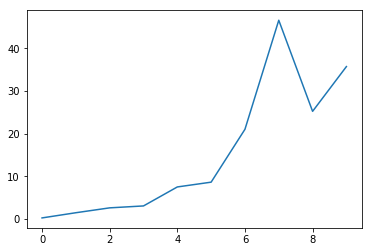

In [12]:
times = []
for i in range(10):
    _, _, t = recursive_feature_selection('forward', dataset_1.columns[:10*(i+1)], dataset_1, target_1, LinearRegression())
    times.append(t)
plt.plot(times)

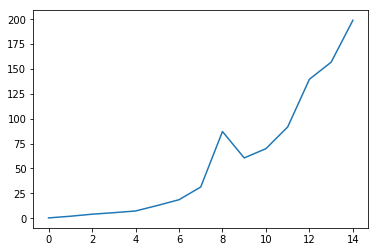

In [13]:
times = []
for i in range(15):
    _, _, t = recursive_feature_selection('backward', dataset_1.columns[:10*(i+1)], dataset_1, target_1, LinearRegression())
    times.append(t)
plt.plot(times)